In [ ]:
#from IPython.display import Image
#Image(filename='bco-estado-cl.png')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carga de datos
data = pd.read_csv("https://raw.githubusercontent.com/secarvallo/MLY0100/refs/heads/main/Labs/02.-LabsML/Taller02_Bank/bank.csv", sep=";")

# Business Understanding

### Contexto:
El banco busca promover un producto financiero específico: el **depósito a plazo fijo (term deposit)**.  
Para esto, se realizaron campañas de marketing directo principalmente por vía telefónica, donde se contactó a clientes con el fin de ofrecerles este producto.  

El desafío principal es que el costo de estas campañas es alto (tiempo y recursos), y la mayoría de los clientes contactados no acepta la oferta. Por lo tanto, es clave entender qué perfiles de clientes son más propensos a aceptar, así como las condiciones externas y del proceso de contacto que influyen en el éxito.  

### Objetivo:
El objetivo es **analizar y comprender los datos de clientes, campañas de marketing y contexto socioeconómico**, con el fin de:  
- Identificar **patrones de comportamiento** que distingan a los clientes que aceptan el depósito a plazo.  
- Reconocer qué **variables tienen mayor impacto en la decisión** (ejemplo: edad, tipo de empleo, duración de la llamada, historial crediticio, contexto económico).  
- Sentar las bases para un **modelo predictivo de machine learning** que permita al banco optimizar futuras campañas, enfocándose en los clientes con mayor probabilidad de éxito.

In [ ]:
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   ### Related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   ### Other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

   ### Social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric)

  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     

  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2929,29,admin.,single,unknown,no,yes,no,cellular,mar,mon,...,1,999,0,nonexistent,-1.8,93.369,-34.8,0.652,5008.7,yes
1502,38,admin.,married,university.degree,no,yes,no,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
2059,32,blue-collar,married,basic.9y,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
2776,45,blue-collar,married,basic.4y,no,no,no,cellular,jul,tue,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
4072,32,blue-collar,married,professional.course,no,yes,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,no


In [ ]:
data.shape[0], data.shape[1]

(4119, 21)

In [ ]:
data.shape

(4119, 21)

In [ ]:
data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
categorical_vars = data.select_dtypes(exclude=np.number).columns.to_list()
categorical_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
numerical_vars = data.select_dtypes(include=np.number).columns.to_list()
numerical_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
valores_unicos = data['job'].unique()
valores_unicos

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

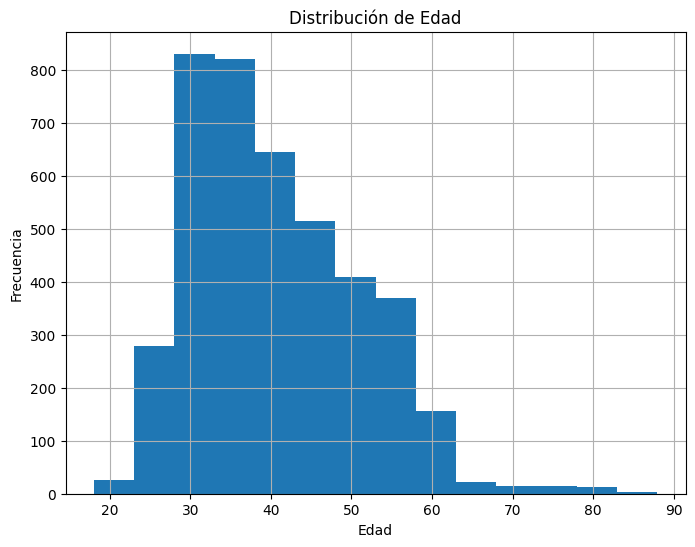

In [ ]:
k = int(np.ceil(1+np.log2(data.shape[0])))
data['age'].hist(bins=k, figsize=(8,6)).set_title("Distribución de Edad")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Distribución de Edad de los Clientes

Este gráfico muestra cómo se distribuyen las edades de las personas que fueron contactadas en la campaña para ofrecer depósitos a plazo fijo.

Lo que se busca con esto es ver si hay más clientes concentrados en ciertos rangos de edad. Esto importa porque la edad puede influir mucho en la decisión: los más jóvenes suelen estar menos interesados en ahorrar a largo plazo, mientras que personas de mediana edad o mayores tienden a valorar más este tipo de productos.

Para el banco, este análisis ayuda a enfocar mejor las campañas, dirigiéndolas hacia los grupos etarios que tienen más posibilidades de aceptar la oferta y así gastar menos recursos en llamadas que probablemente no resulten

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'basic.9y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'university.degree'),
  Text(3, 0, 'professional.course'),
  Text(4, 0, 'basic.6y'),
  Text(5, 0, 'basic.4y'),
  Text(6, 0, 'unknown'),
  Text(7, 0, 'illiterate')])

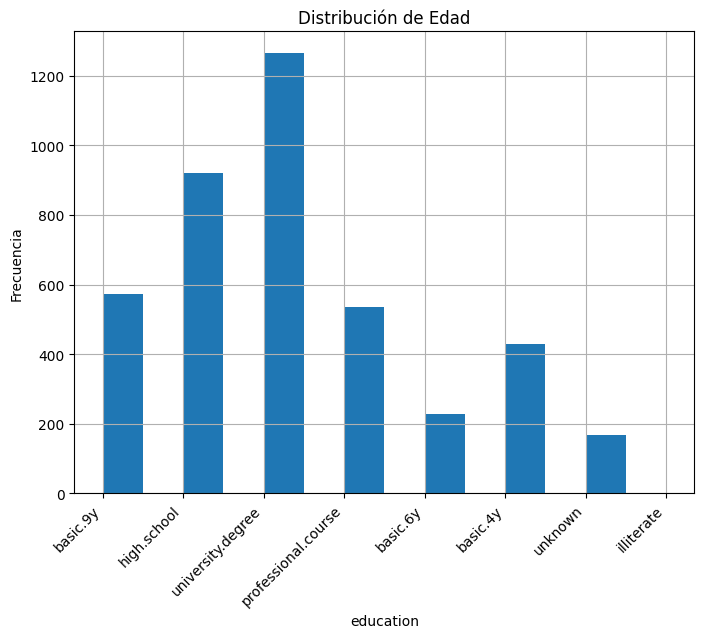

In [ ]:
k = int(np.ceil(1+np.log2(data.shape[0])))
data['education'].hist(bins=k, figsize=(8,6)).set_title("Distribución de Edad")
plt.xlabel('education')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

Distribución del Nivel Educativo

Este gráfico muestra cuántos clientes contactados tienen distintos niveles de educación (básica, media, universitaria, etc.).

La idea de verlo es entender si el nivel de estudios influye en aceptar o no el depósito a plazo. Por ejemplo, alguien con estudios más altos puede conocer mejor este tipo de productos y estar más dispuesto, mientras que otros pueden ser más desconfiados o no verlo tan útil.

Para el banco, esto ayuda a adaptar el mensaje según el perfil y a enfocar las campañas donde haya más probabilidad de éxito

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'entrepreneur'),
  Text(4, 0, 'self-employed'),
  Text(5, 0, 'technician'),
  Text(6, 0, 'management'),
  Text(7, 0, 'student'),
  Text(8, 0, 'retired'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

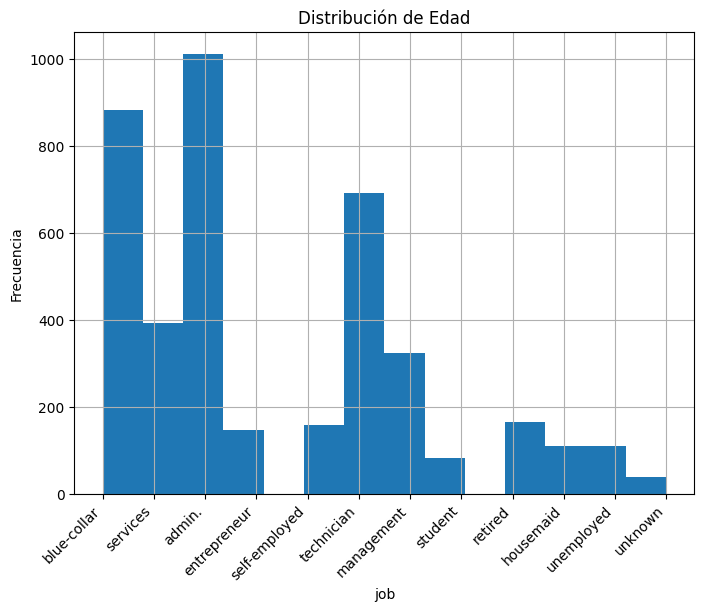

In [ ]:
k = int(np.ceil(1+np.log2(data.shape[0])))
data['job'].hist(bins=k, figsize=(8,6)).set_title("Distribución de Edad")
plt.xlabel('job')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

Distribución del Tipo de Empleo

Aquí se ve en qué tipo de trabajo están los clientes: administrativo, técnico, servicios, desempleado, jubilado, etc. Cada barra representa cuántos clientes hay en cada categoría laboral.

Esto es clave porque la situación laboral suele estar muy relacionada con el interés por un depósito a plazo. Por ejemplo:

Un jubilado podría estar más interesado en ahorrar de manera segura.

Un trabajador independiente o desempleado quizás no tenga tanta estabilidad para invertir.

Profesionales o administrativos con ingresos más estables podrían estar más abiertos a este producto.

Para el banco, este análisis ayuda a perfilar mejor a los clientes según su ocupación y a priorizar los segmentos donde hay mayor chance de éxito en la campaña.

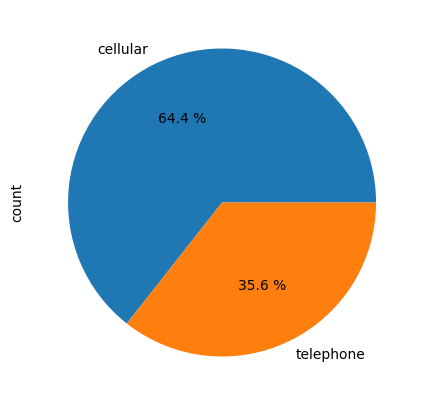

In [ ]:
data['contact'].value_counts().plot.pie(figsize=(5,5), autopct="%0.1f %%");

Métodos de Contacto

El gráfico indica qué porcentaje de clientes fue contactado por cada canal (por ejemplo, teléfono celular, teléfono fijo, etc.).

Esto sirve para ver qué medio se utilizó más y también para analizar si el tipo de contacto influye en la probabilidad de que un cliente acepte la oferta. Quizás llamar al celular funciona mejor que al teléfono fijo, o al revés.

Para el banco, esta información es útil porque permite enfocar recursos en el canal más efectivo y reducir costos en aquellos que no generan buenos resultados

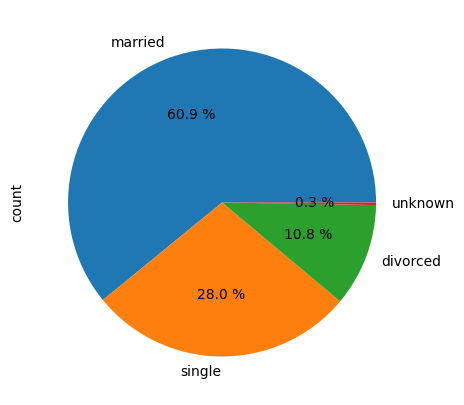

In [ ]:
data['marital'].value_counts().plot.pie(figsize=(5,5), autopct="%0.1f %%");

Estado Civil de los Clientes

El gráfico muestra el porcentaje de clientes casados, solteros, divorciados, etc., dentro de la campaña.

¿Por qué importa? Porque el estado civil puede influir en las decisiones financieras:

Personas casadas podrían pensar más en ahorrar para la familia y ver atractivo un depósito a plazo.

Solteros quizás tengan menos interés en comprometer dinero a largo plazo.

Divorciados o viudos pueden tener un enfoque distinto según su situación económica.

Para el banco, entender esta composición ayuda a ver qué grupo representa la mayor parte de los contactos y a pensar si la aceptación del producto varía según la situación familiar. Eso permitiría ajustar el enfoque de la campaña según cada perfil.

In [ ]:
# Estado Civil

superviviente_por_genero = data[['loan', 'marital']].groupby(['marital'], as_index=False).count().sort_values(by='loan', ascending=False)
superviviente_por_genero


,marital,loan
1,married,2509
2,single,1153
0,divorced,446
3,unknown,11


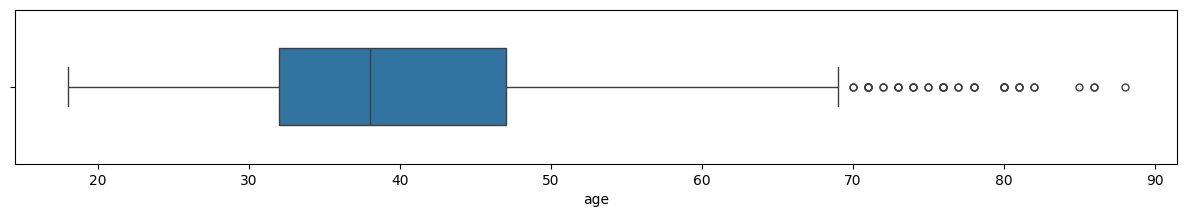

In [ ]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data["age"], fliersize=5, width=0.5);

Distribución de Edad

Este boxplot permite ver de manera resumida cómo se distribuyen las edades:

La caja central indica dónde está concentrada la mayoría de los clientes (mediana y cuartiles).

Las “bigotes” muestran los rangos más comunes.

Los puntitos fuera del rango son los outliers (clientes con edades muy distintas al resto, por ejemplo, muy jóvenes o muy mayores).

¿Por qué es útil?
Porque ayuda a identificar si la base de clientes está concentrada en ciertos rangos de edad y también si hay valores extremos que podrían afectar el análisis

plt.figure(figsize=(15,2))
sns.boxplot(x=data["age"], fliersize=5, width=0.5);

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'entrepreneur'),
  Text(4, 0, 'self-employed'),
  Text(5, 0, 'technician'),
  Text(6, 0, 'management'),
  Text(7, 0, 'student'),
  Text(8, 0, 'retired'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

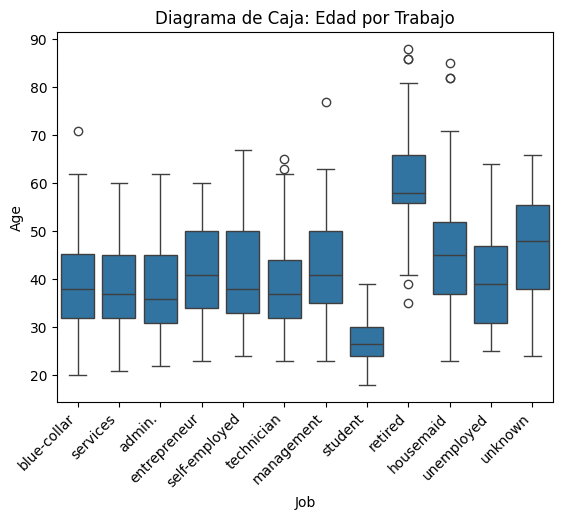

In [ ]:
if 'jobs' in data.columns and 'job' not in data.columns: data = data.rename(columns={'jobs': 'job'})
data['age'] = pd.to_numeric(data['age'], errors='coerce')

sns.boxplot(x='job', y='age', data=data)
plt.title('Diagrama de Caja: Edad por Trabajo')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')

Diagrama de Caja: Edad por Trabajo

Este gráfico muestra, para cada tipo de empleo, cómo se distribuyen las edades de los clientes.

Cada caja resume el rango de edad más común en ese grupo laboral.

La línea en el medio indica la edad promedio o típica (mediana).

Los puntos fuera de la caja son casos extremos (clientes muy jóvenes o muy mayores en ese trabajo).

¿Por qué es interesante?
Porque permite ver si ciertos empleos concentran a clientes más jóvenes o más adultos. Por ejemplo:

Trabajos técnicos o de servicios suelen tener clientes más jóvenes.

Profesionales, administrativos o jubilados tienden a agrupar edades mayores.

Para el banco, esto ayuda a perfilar mejor: no es lo mismo ofrecer un depósito a plazo a un estudiante o trabajador de servicios de 20 años que a un funcionario público o un jubilado de 60. Saber estas diferencias permite enfocar mejor las llamadas según la combinación de edad y ocupación

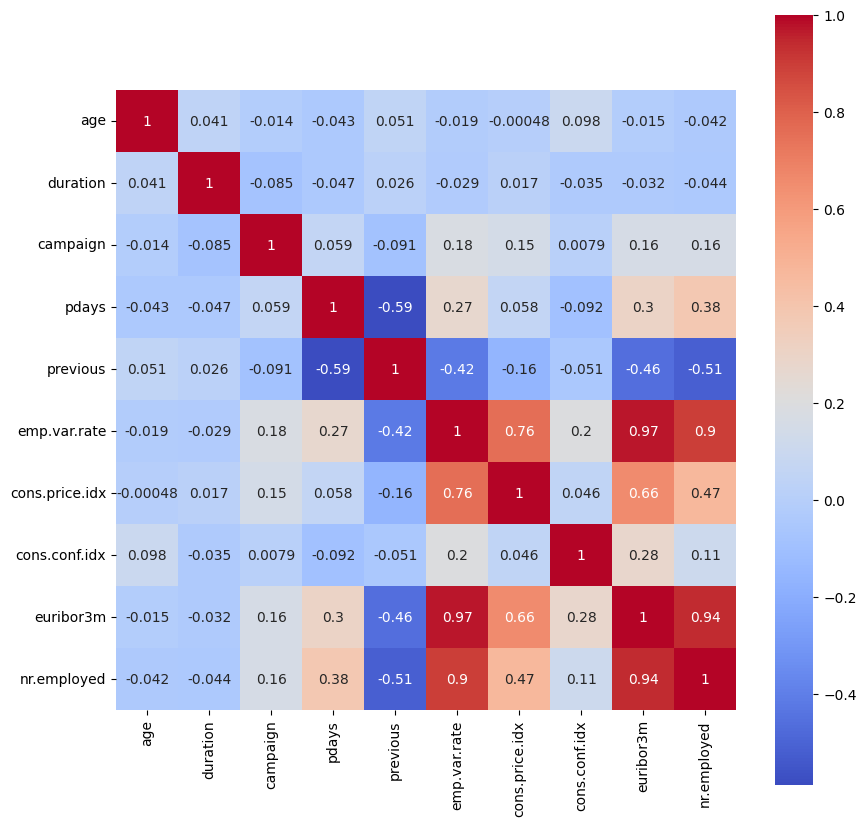

In [ ]:
numeric_data = data.select_dtypes(include=np.number)
corr = numeric_data.corr(method='pearson')

plt.figure(figsize=(10,10))
sns.heatmap(data=corr, square=True, annot=True, cmap="coolwarm")
plt.show()

Relación entre Variables Numéricas

Este gráfico muestra cómo se relacionan las distintas variables numéricas entre sí. Por ejemplo, edad, saldo, duración de la llamada, etc.

Los colores muestran si las variables suben o bajan juntas (positivo) o si una sube mientras la otra baja (negativo).

Los números indican qué tan fuerte es esa relación.

¿Por qué importa?
Porque ayuda a ver qué cosas podrían influir más en que un cliente acepte el depósito:

Si la duración de la llamada tiene una relación positiva fuerte con la aceptación, significa que llamadas más largas aumentan las chances.

Lo mismo con el saldo o la edad: si se ve relación, son pistas de quién es más propenso a aceptar.

Para el banco, esto sirve para entender mejor qué factores realmente importan y poder enfocar las campañas en los clientes que tienen más probabilidades de decir que sí.

##Variables importantes:

-[previous , pdays ]

##Variables con mayor correlación:

-[emp.var.rate , eurinbor3m] (0.97)

-[eurinbor3m , nr.employed] (0.94)

-[emp.var.rate , nr.employed] (0.90)

-[previous, pdays] (-0.59)



/tmp/ipython-input-4103902145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan", y="duration", data=data, palette="Set3")


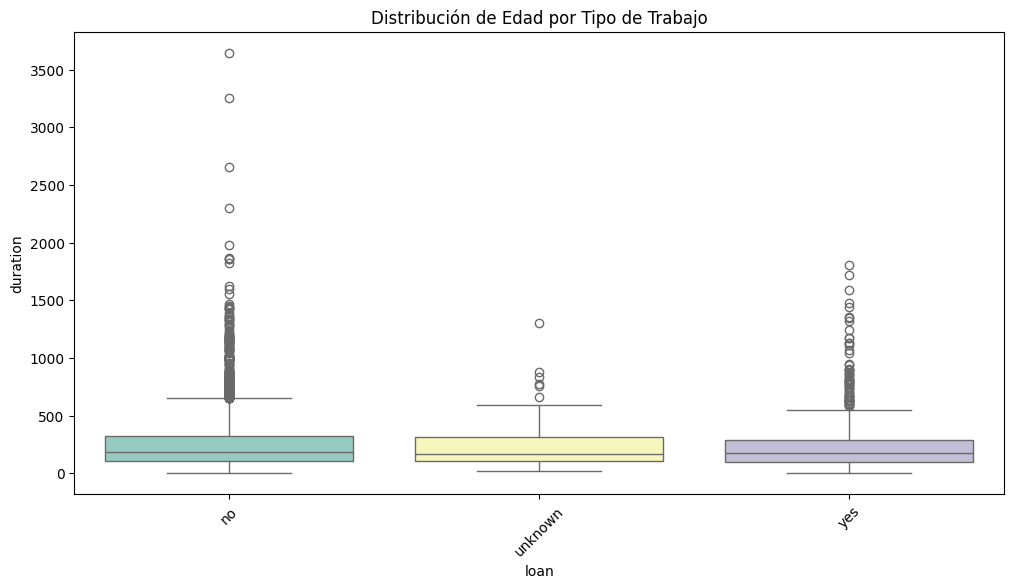

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="loan", y="duration", data=data, palette="Set3")
plt.xticks(rotation=45)
plt.title("")
plt.show()

Interpretación humana

El eje y (500, 1000, 1500…) muestra la duración de la llamada en segundos (o la unidad que estén usando).

El eje x (yes, no, unknown) indica el grupo de clientes según esa característica.

La caja central muestra la duración típica de la llamada para cada grupo.

Los puntitos fuera de la caja son llamadas mucho más cortas o largas que la mayoría.

Qué nos dice:

Permite ver si ciertos grupos requieren llamadas más largas o más cortas.

Esto ayuda al banco a ajustar la estrategia según cada perfil y optimizar tiempo y recursos

/tmp/ipython-input-774479271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="duration", data=data, palette="Set3")


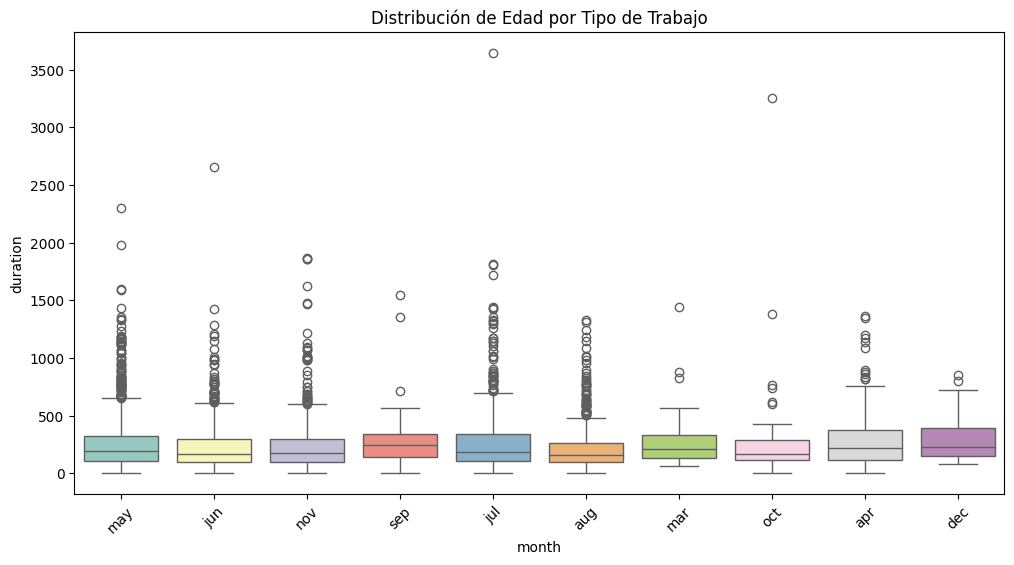

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="month", y="duration", data=data, palette="Set3")
plt.xticks(rotation=45)
plt.title("")
plt.show()

Duración de la Llamada por Mes

El eje y sigue mostrando la duración de la llamada (500, 1000, 1500, etc.).

Cada caja indica cómo se distribuyen las duraciones de las llamadas en cada mes.

La línea central es la mediana de duración, los bigotes muestran los rangos típicos y los puntos fuera son llamadas muy cortas o muy largas.

Qué nos dice:

Permite ver si hay meses en que las llamadas suelen ser más largas o más cortas, lo que puede indicar que los clientes están más o menos receptivos según la época del año.

Por ejemplo, un mes con llamadas más largas podría significar que los clientes necesitan más tiempo para decidir, o que la campaña no es tan efectiva.

Para el banco, esto ayuda a planificar mejor las campañas, ajustando la duración promedio de las llamadas según el mes y optimizando recursos

/tmp/ipython-input-2480690720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day_of_week", y="duration", data=data, palette="Set3")


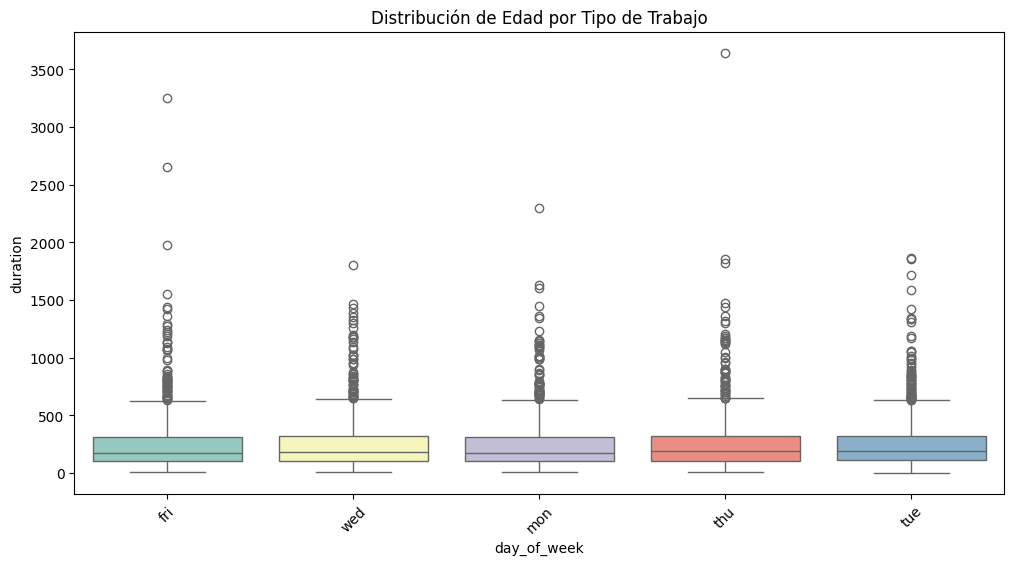

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="day_of_week", y="duration", data=data, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribución de Edad por Tipo de Trabajo")
plt.show()

Duración de la Llamada por Día de la Semana

El eje y sigue mostrando la duración de la llamada (por ejemplo, 500, 1000, 1500…).

Cada caja indica cómo se distribuyen las duraciones de las llamadas según el día (lunes, martes, miércoles, etc.).

La línea central es la mediana, los bigotes muestran el rango habitual y los puntos fuera son llamadas mucho más largas o cortas que la mayoría.

Qué nos dice:

Permite ver si ciertos días requieren llamadas más largas o más cortas.

Por ejemplo, los lunes podrían ser más complicados porque la gente está ocupada, mientras que otros días podrían ser más efectivos.

Para el banco, esto ayuda a planificar mejor las campañas, eligiendo los días más eficientes para llamar y optimizando tiempo y recursos

/tmp/ipython-input-876715630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="housing", y="duration", data=data, palette="Set3")


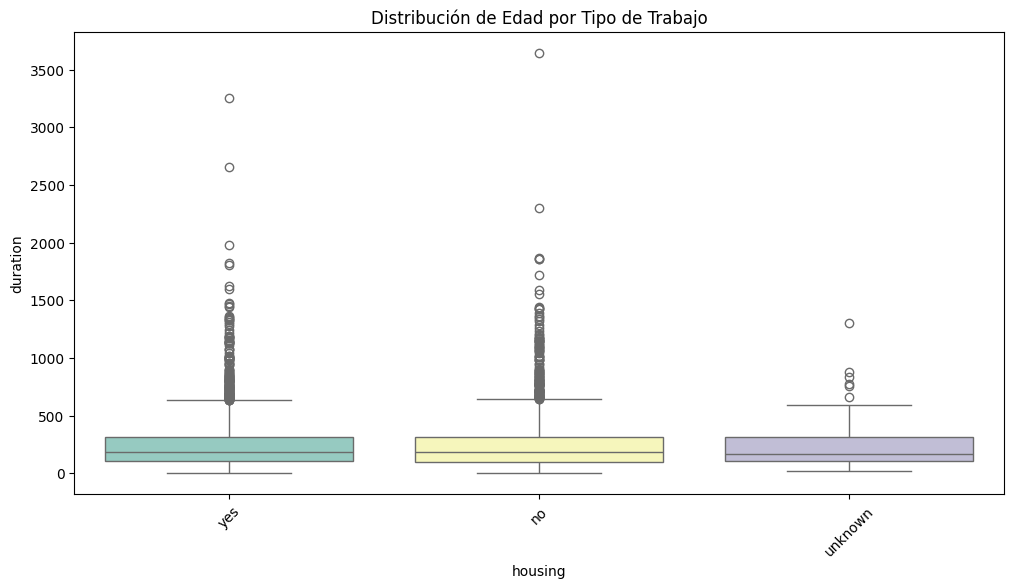

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="housing", y="duration", data=data, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribución de Edad por Tipo de Trabajo")
plt.show()




Duración de la Llamada por Tipo de Vivienda

El eje y muestra la duración de la llamada (500, 1000, 1500…).

Cada caja indica cómo se distribuyen las duraciones de las llamadas según el tipo de vivienda.

La línea central es la mediana, los bigotes muestran el rango más común y los puntos fuera son llamadas mucho más cortas o largas que la mayoría.

Qué nos dice:

Permite identificar si clientes con distintos tipos de vivienda requieren llamadas más largas o más cortas.

Por ejemplo, clientes con hipoteca o vivienda propia podrían estar más interesados en productos de ahorro y responder más rápido, mientras que quienes alquilan podrían necesitar más explicación.

Para el banco, esto ayuda a ajustar la estrategia de llamadas según el perfil de vivienda, optimizando tiempo y aumentando la probabilidad de éxito

/tmp/ipython-input-735033964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="campaign", y="age", data=data, palette="Set3")


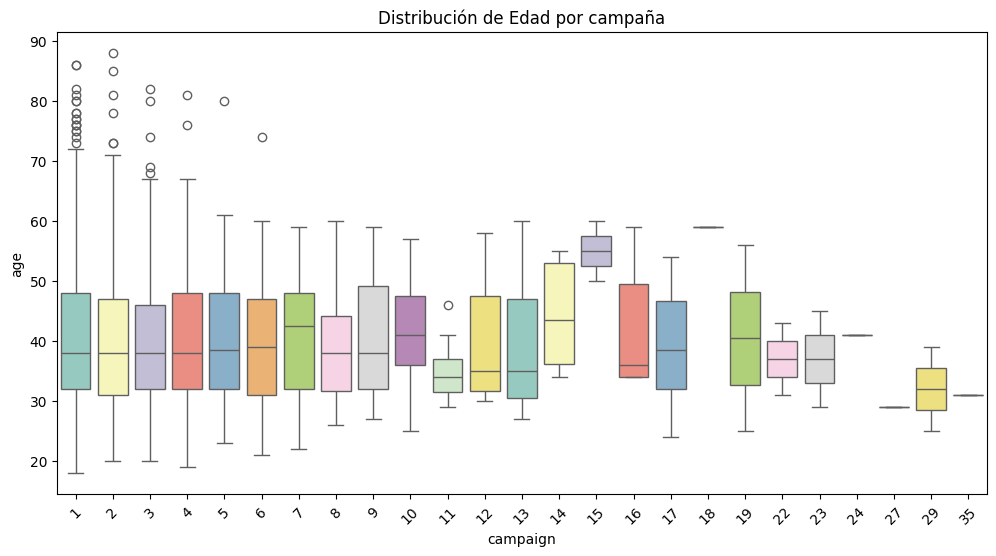

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="campaign", y="age", data=data, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribución de Edad por campaña")
plt.show()

Distribución de Edad por Campaña

El eje y muestra la edad de los clientes.

El eje x indica las diferentes campañas realizadas.

Cada caja representa cómo se distribuyen las edades dentro de cada campaña: la línea del medio es la mediana, los bigotes muestran el rango habitual y los puntos fuera son clientes con edades muy distintas al resto.

Qué nos dice:

Permite ver si ciertas campañas estuvieron más orientadas a clientes jóvenes o adultos.

También ayuda a identificar patrones: algunas campañas podrían haber contactado principalmente a un rango etario que responde mejor a los depósitos a plazo.

Para el banco, esto sirve para analizar qué campañas funcionaron mejor con qué grupos de edad, y así orientar futuras campañas hacia los clientes con más probabilidad de éxito.

/tmp/ipython-input-406811723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="campaign", y="duration", data=data, palette="Set3")


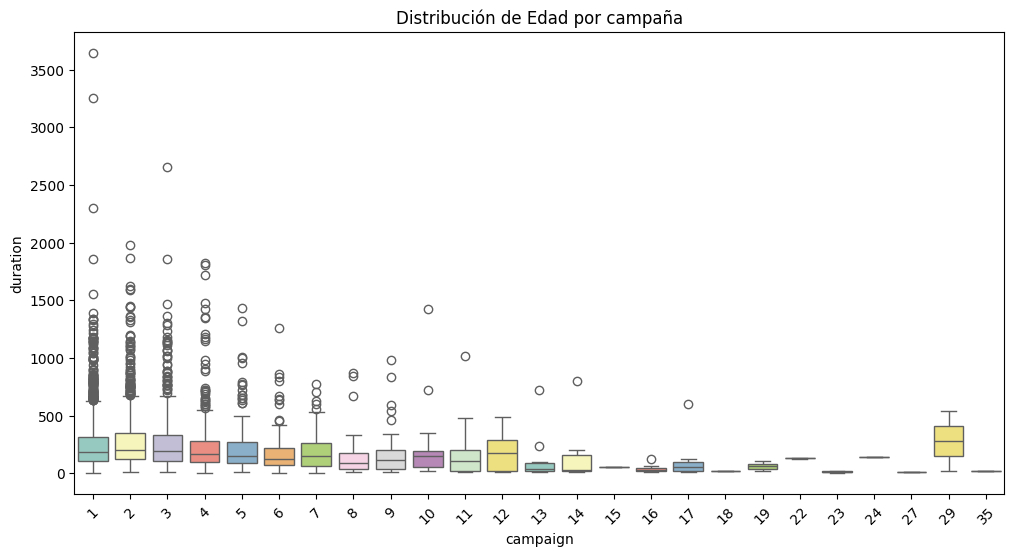

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="campaign", y="duration", data=data, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribución de Edad por campaña")
plt.show()

Duración de la Llamada por Campaña

El eje y muestra la duración de la llamada (por ejemplo, 500, 1000, 1500…).

El eje x indica las diferentes campañas realizadas.

Cada caja representa cómo se distribuyen las duraciones dentro de cada campaña: la línea central es la mediana, los bigotes muestran el rango típico y los puntos fuera son llamadas muy cortas o largas.

Qué nos dice:

Permite ver si ciertas campañas requerían llamadas más largas o más cortas.

Esto puede indicar que algunos grupos de clientes necesitan más tiempo para decidir o que algunas campañas fueron más efectivas y lograron respuestas rápidas.

Para el banco, esto ayuda a optimizar futuras campañas, enfocando recursos en las que generen resultados con menos tiempo de llamada y ajustando la duración según el tipo de cliente y la campaña.

/tmp/ipython-input-2424700521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="campaign", y="y", data=data, palette="Set3")


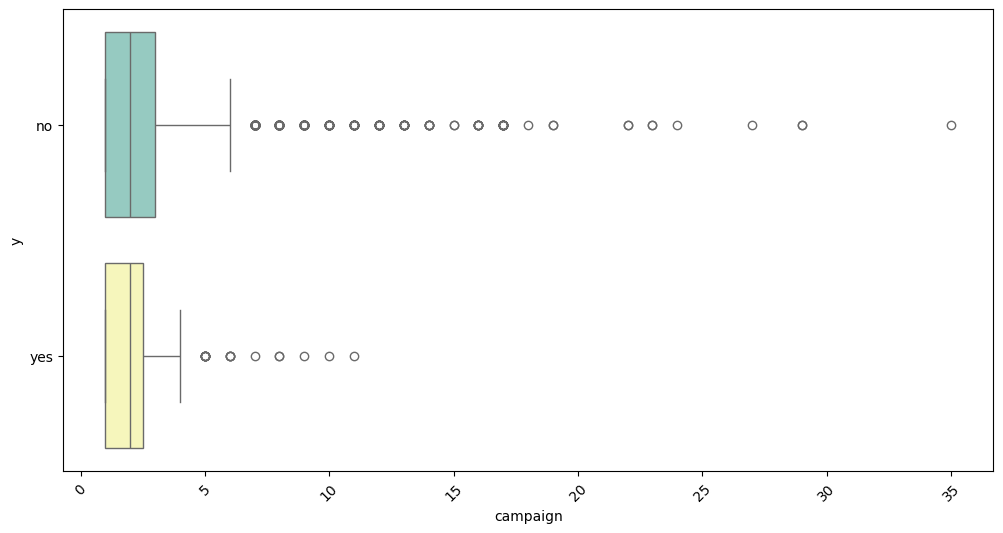

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="campaign", y="y", data=data, palette="Set3")
plt.xticks(rotation=45)
plt.title("")
plt.show()

Resultado de la Campaña por Clientes

El eje y muestra la variable y (generalmente codificada como 1 = sí aceptó, 0 = no aceptó).

El eje x indica las diferentes campañas realizadas.

Cada caja muestra cómo se distribuyen las respuestas dentro de cada campaña: la línea central indica la mediana de aceptación y los puntos fuera son casos atípicos.

Qué nos dice:

Permite ver qué campañas tuvieron más éxito en términos de aceptación.

Si algunas campañas muestran medianas más altas, significa que fueron más efectivas en convencer a los clientes.

También ayuda a identificar campañas donde los clientes rechazaron la oferta con más frecuencia.

Para el banco, este gráfico sirve para evaluar y comparar la efectividad de cada campaña, y decidir en cuáles conviene invertir más tiempo y recursos en el futuro

/tmp/ipython-input-3881642316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="education", y="age", data=data, palette="Set3")


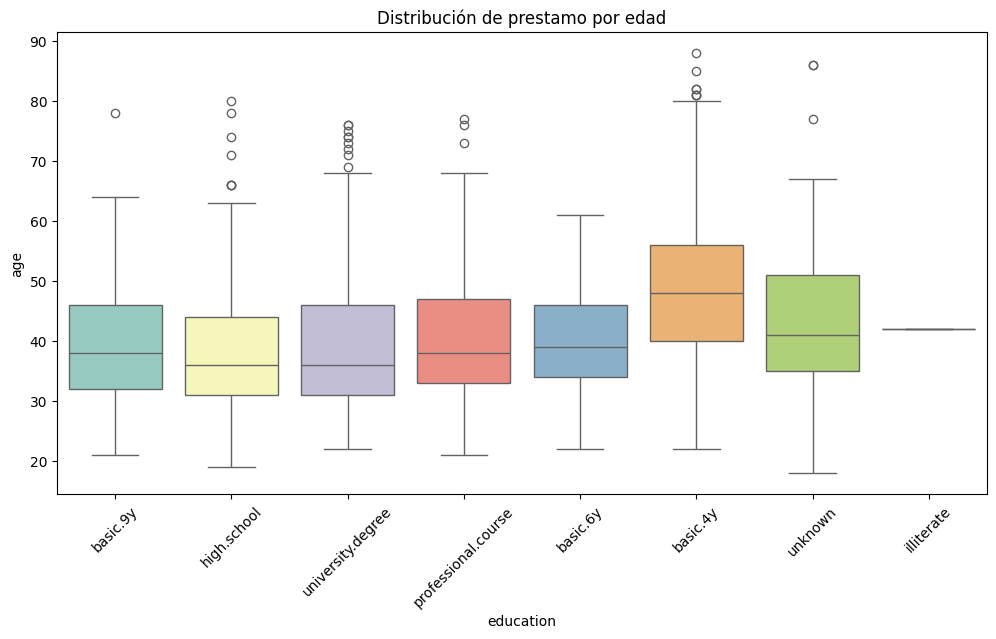

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="education", y="age", data=data, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribución de prestamo por edad")
plt.show()

Distribución de Edad según Nivel Educativo

El eje y muestra la edad de los clientes.

El eje x indica el nivel de educación (primaria, secundaria, universitaria, etc.).

Cada caja representa cómo se distribuyen las edades dentro de cada nivel educativo: la línea central es la mediana, los bigotes muestran el rango habitual y los puntos fuera son casos atípicos.

Qué nos dice:

Permite ver si ciertos niveles educativos concentran clientes más jóvenes o más adultos.

Por ejemplo, clientes con estudios universitarios pueden ser más jóvenes en promedio que clientes con educación básica, dependiendo de la base de datos.

Para el banco, esto ayuda a perfilar mejor a los clientes y entender cómo la edad y la educación podrían influir en la aceptación del depósito a plazo

/tmp/ipython-input-3102947869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="marital", y="age", data=data, palette="Set3")


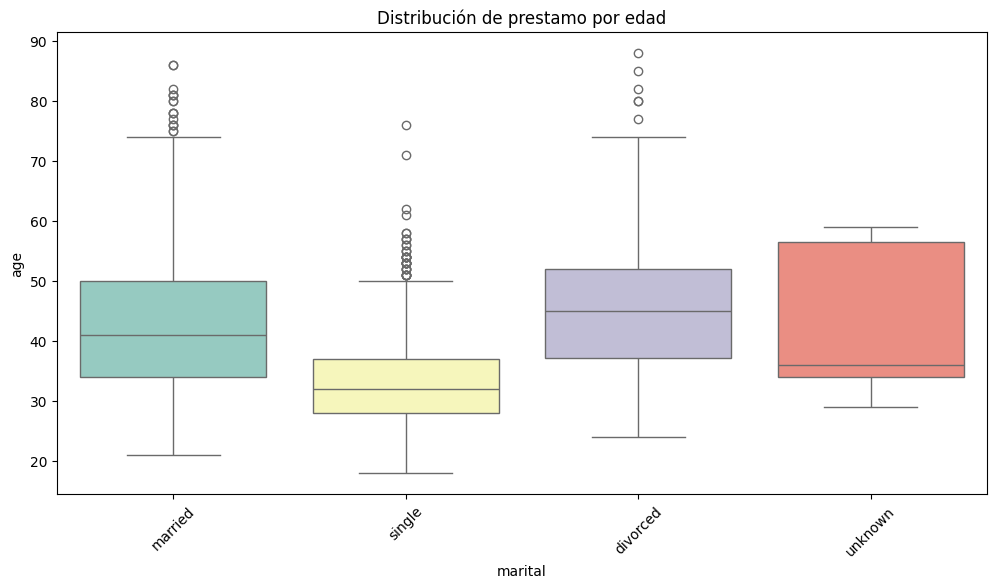

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="marital", y="age", data=data, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribución de prestamo por edad")
plt.show()

Distribución de Edad según Estado Civil

El eje y muestra la edad de los clientes.

El eje x indica el estado civil (soltero, casado, divorciado, etc.).

Cada caja representa cómo se distribuyen las edades dentro de cada grupo: la línea central es la mediana, los bigotes muestran el rango más común y los puntos fuera son clientes con edades muy distintas.

Qué nos dice:

Permite ver si ciertos estados civiles concentran clientes más jóvenes o más adultos.

Por ejemplo, los casados podrían tender a un rango de edad más alto que los solteros.

Para el banco, esto ayuda a perfilarlos mejor y a entender cómo la edad y el estado civil podrían influir en la decisión de aceptar un depósito a plazo

/tmp/ipython-input-2769491666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="campaign", data=data, palette="Set3")


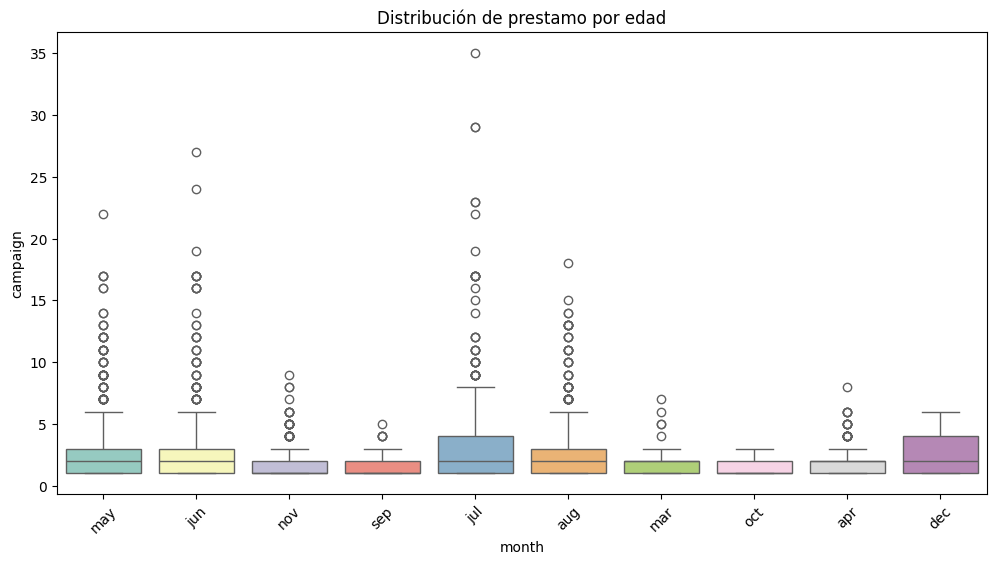

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="month", y="campaign", data=data, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribución de prestamo por edad")
plt.show()

Número de Contactos por Mes

El eje y muestra la cantidad de veces que se contactó a un cliente en la campaña.

El eje x indica los meses del año.

Cada caja muestra cómo se distribuye la cantidad de contactos dentro de cada mes: la línea central es la mediana, los bigotes muestran el rango típico y los puntos fuera son casos con muchos más o menos contactos de lo habitual.

Qué nos dice:

Permite ver si en algunos meses se hicieron más llamadas por cliente que en otros.

Esto ayuda a identificar campañas más intensivas o meses donde los clientes recibieron menos contactos.

Para el banco, sirve para analizar la estrategia de contacto y ajustar la frecuencia de llamadas según el mes, optimizando recursos y aumentando la probabilidad de éxito

In [ ]:
vu_job = data['job'].unique()
vu_job

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [ ]:
vu_job = data['marital'].unique()
vu_job

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
vu_job = data['education'].unique()
vu_job

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [ ]:
vu_job = data['default'].unique()
vu_job

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
vu_job = data['housing'].unique()
vu_job

array(['yes', 'no', 'unknown'], dtype=object)

In [ ]:
vu_job = data['loan'].unique()
vu_job

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
vu_job = data['contact'].unique()
vu_job

array(['cellular', 'telephone'], dtype=object)

In [ ]:
vu_job = data['month'].unique()
vu_job

array(['may', 'jun', 'nov', 'sep', 'jul', 'aug', 'mar', 'oct', 'apr',
       'dec'], dtype=object)

In [ ]:
vu_job = data['day_of_week'].unique()
vu_job

array(['fri', 'wed', 'mon', 'thu', 'tue'], dtype=object)

In [ ]:
vu_job = data['poutcome'].unique()
vu_job

array(['nonexistent', 'failure', 'success'], dtype=object)